/tmp/ipykernel_13759/2700842569.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread("/datassd2/sswang/image_matching/data/isc_data/training_imgs/training/T000000.jpg")


Original:


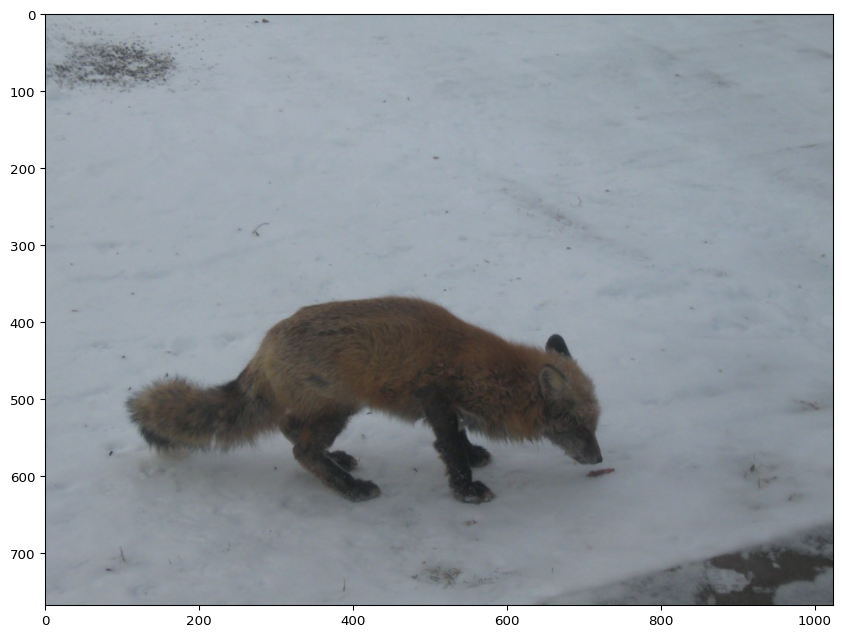

In [45]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import imgaug.parameters as iap
image = imageio.imread("/datassd2/sswang/image_matching/data/isc_data/training_imgs/training/T000000.jpg")

print("Original:")
ia.imshow(image)
%matplotlib inline

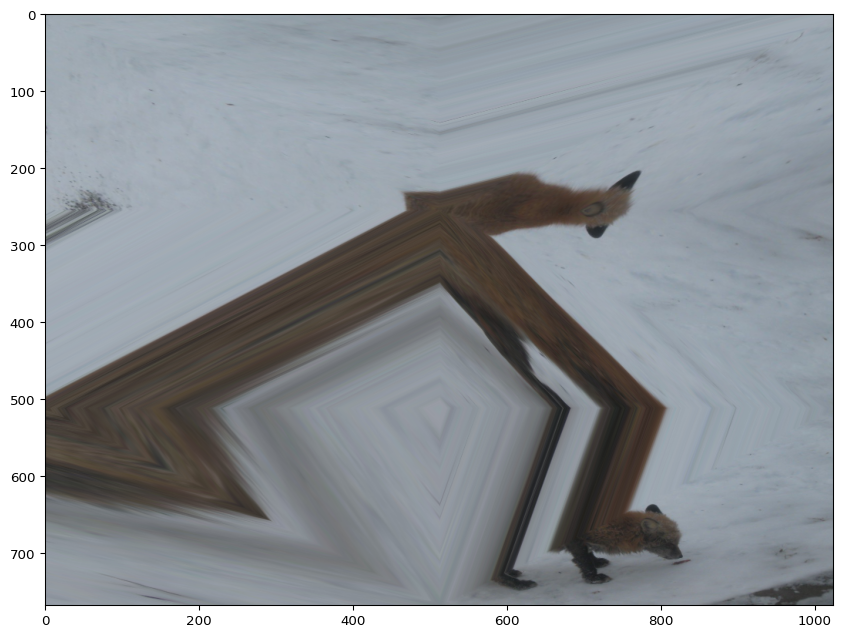

In [62]:

aug = iaa.PiecewiseAffine(scale=0.3)
img1 = aug(image=image)
ia.imshow(img1)

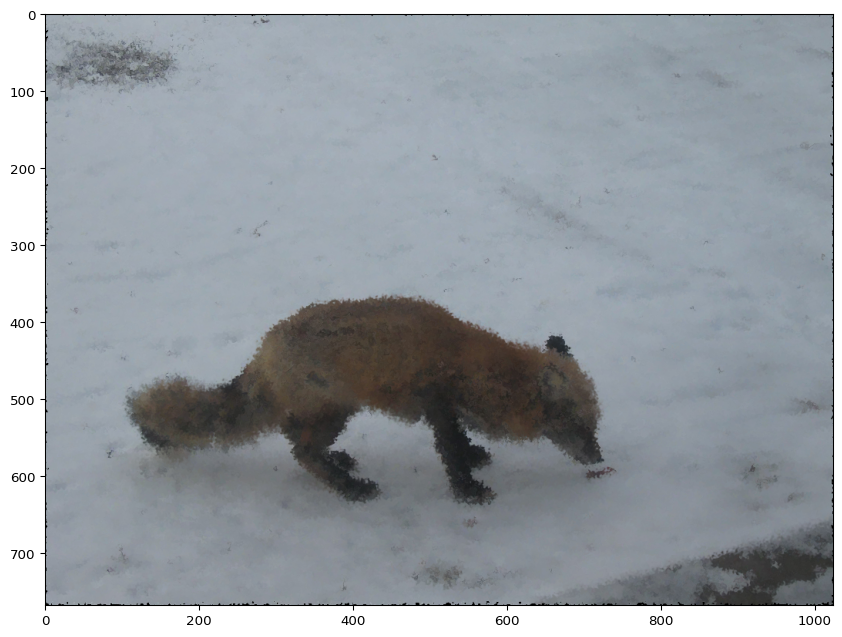

In [68]:
aug = iaa.ElasticTransformation(alpha=10, sigma=1)
img2 = aug(image=image)
ia.imshow(img2)

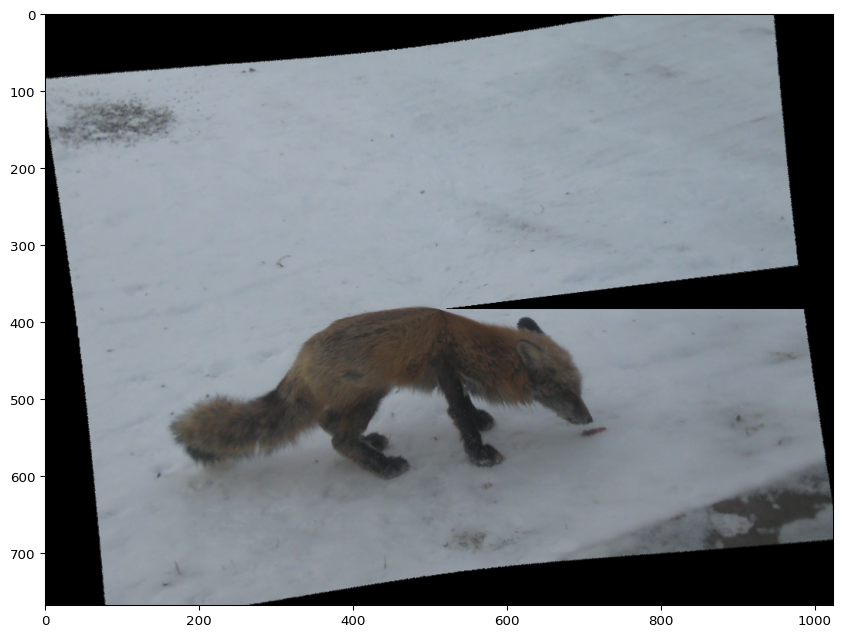

In [83]:
aug = iaa.WithPolarWarping(
    iaa.Affine(
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}
    )
)

img2 = aug(image=image)
ia.imshow(img2)

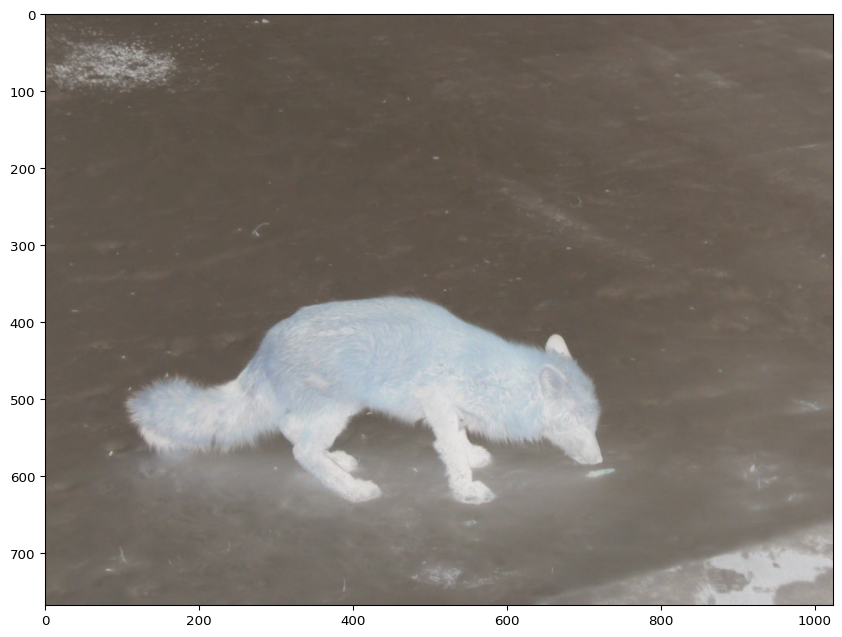

In [85]:
aug = iaa.Invert(0.25, per_channel=0.6)
img3 = aug(image=image)
print(type(img3))
ia.imshow(img3)

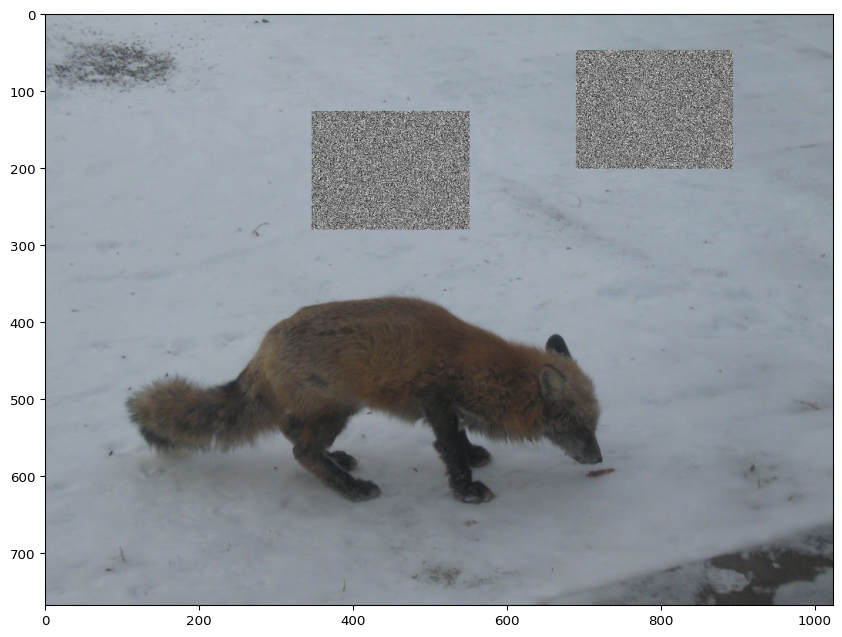

In [44]:
# aug =  iaa.Cutout(fill_mode="gaussian", fill_per_channel=True)
aug = iaa.Cutout(nb_iterations=(1, 5), fill_mode="gaussian", size=0.2, squared=False)
img3 = aug(image=image)
ia.imshow(img3)

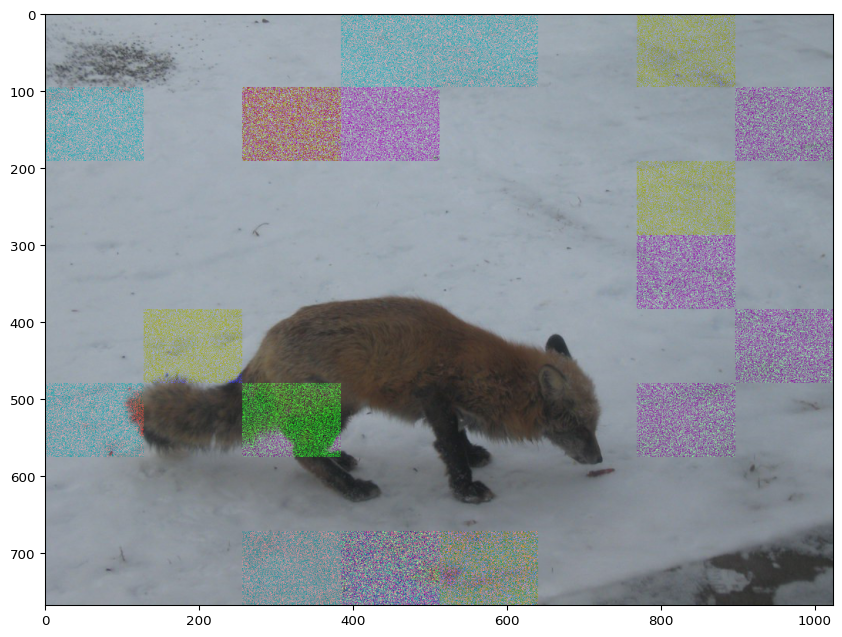

In [49]:
aug = iaa.arithmetic.ReplaceElementwise(
    iap.FromLowerResolution(iap.Binomial(0.1), size_px=8),
    iap.Normal(128, 0.4*128),
    per_channel=0.5)

img3 = aug(image=image)
ia.imshow(img3)

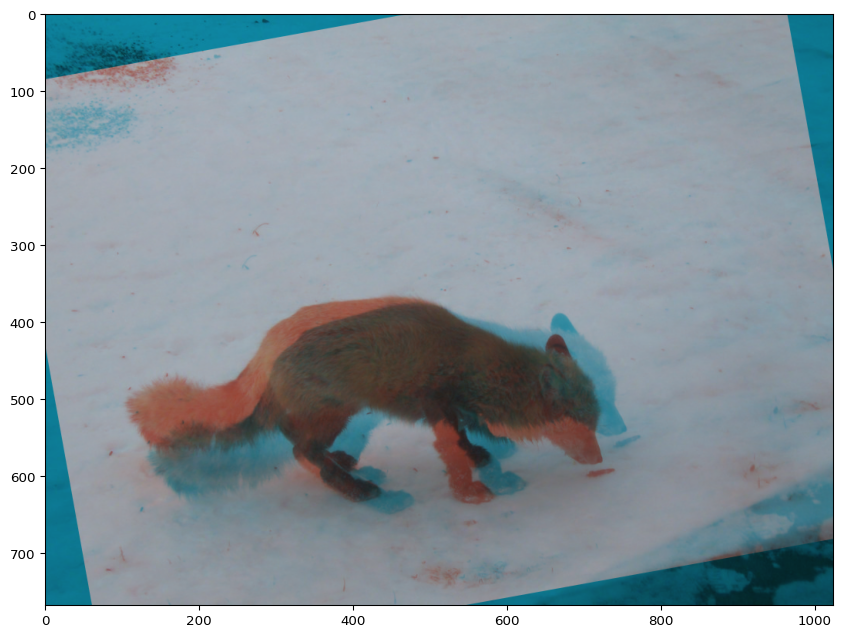

In [55]:
aug = iaa.BlendAlpha(
    (0.0, 1.0),
    iaa.Affine(rotate=(-90, 90)),
    per_channel=0.5)

img = aug(image=image)
ia.imshow(img)

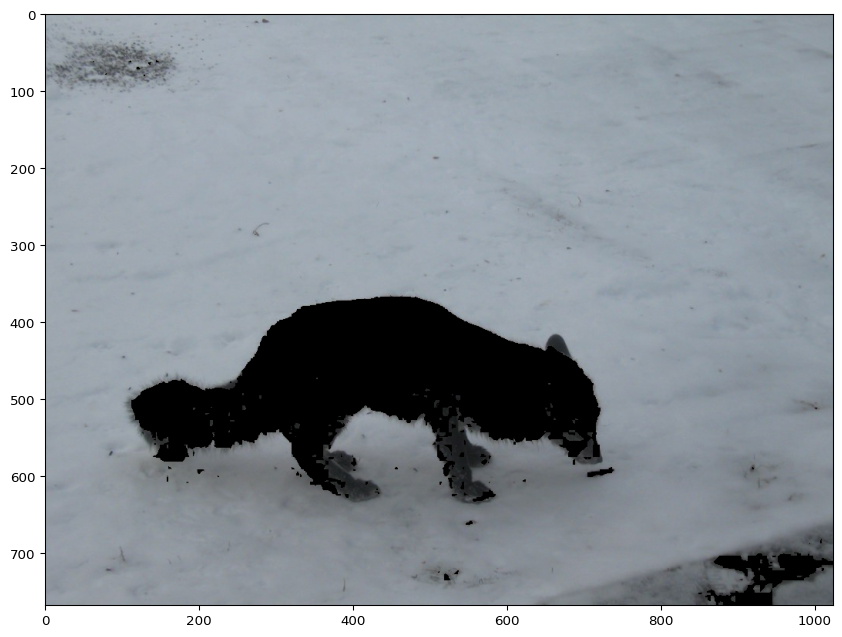

In [58]:
aug = iaa.BlendAlphaSomeColors(iaa.TotalDropout(1.0))

img = aug(image=image)
ia.imshow(img)